In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
df=pd.read_csv('../assets/athlete_events.csv')
region_df=pd.read_csv('../assets/noc_regions.csv')
def preprocess(df,region_df):
    # filtering for summer olympics
    df = df[df['Season'] == 'Summer']
    # merge with region_df
    df = df.merge(region_df, on='NOC', how='left')
    # dropping duplicates
    df.drop_duplicates(inplace=True)
    # one hot encoding medals
    df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)
    return df
df=preprocess(df,region_df)

In [33]:
missing_sex = df[df['Sex'].isnull()]

# Display the rows where 'Sex' is missing
print(missing_sex)

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal, region, notes, Bronze, Gold, Silver]
Index: []


In [34]:
df=df.drop_duplicates(subset={'Team','NOC','Games','Year','City','Sport','Event','Medal'})

In [35]:
gkm=df.loc[df['Sex']=='M']
gkf=df.loc[df['Sex']=='F']
medals_m=gkm.groupby('Medal').count()['ID']
medals_f=gkf.groupby('Medal').count()['ID']
total_athletes=df['ID'].count()
total_male_athlete=gkm['ID'].count()
total_female_athlete=gkf['ID'].count()
total_male_medalist=gkm['Medal'].count()
total_female_medalist=gkf['Medal'].count()
countries=df['Team'].dropna().unique().tolist()
print(countries)

['China', 'Denmark', 'Denmark/Sweden', 'Netherlands', 'Finland', 'Norway', 'Romania', 'Estonia', 'France', 'Taifun', 'Morocco', 'Spain', 'Egypt', 'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey', 'Chile', 'Mexico', 'United States', 'Soviet Union', 'Nicaragua', 'Hungary', 'Nigeria', 'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'United Arab Republic', 'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Thessalonki-1', 'Canada', 'Ireland', 'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan', 'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros', 'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Syria', 'Maldives', 'Ethiopia', 'United Arab Emirates', 'North Yemen', 'Indonesia', 'Philippines', 'Singapore', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Unified Team', 'Japan', 'Congo (Brazzaville)', 'Switzerland', 'Brazil', 'East Germany', 'Monaco', 'Fornebo', 'Israel', 'Vesper Boat Club', 'Ur

In [36]:
def medal_helper(country):
    data = df[df['region'] == country].groupby('Medal')
    return data

gk=medal_helper('India')
gk

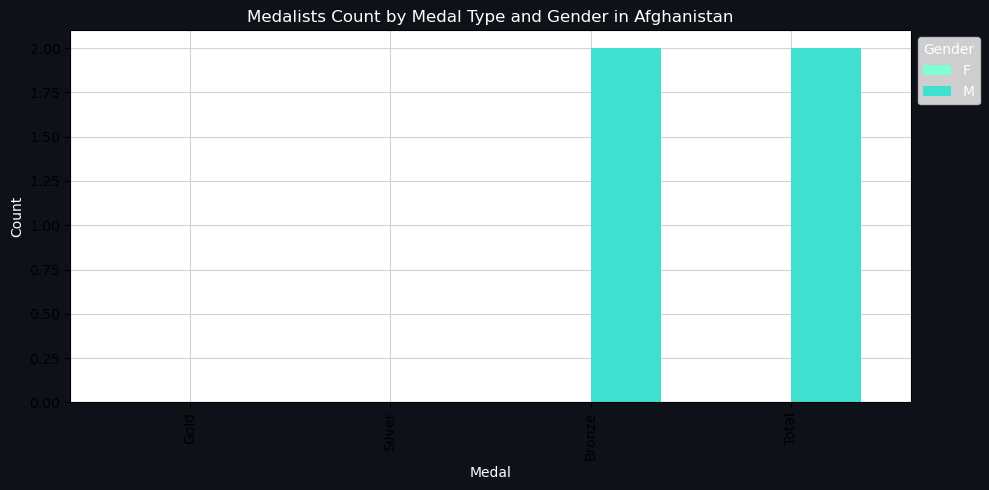

          F    M
Gold    NaN  NaN
Silver  NaN  NaN
Bronze  0.0  2.0
Total   0.0  2.0


In [37]:
country="Afghanistan"
def medalists(country):
    data = df[df['region'] == country]
    pivot_data = data.pivot_table(index='Medal', columns='Sex', values='ID', aggfunc='count', fill_value=0)
    if 'F' not in pivot_data.columns:
        pivot_data['F'] = 0
    if 'M' not in pivot_data.columns:
        pivot_data['M'] = 0
    pivot_data=pivot_data.astype(int)
    pivot_data = pivot_data.fillna(0)
    return pivot_data
gk = medalists(country)
new_row=pd.DataFrame({'F':gk['F'].sum(),'M':gk['M'].sum()},index=['Total'])
gk= pd.concat([new_row,gk.loc[:]])
desired_order = ['Gold', 'Silver', 'Bronze', 'Total']
gk=gk.reindex(desired_order, axis=0)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_facecolor('#0e1117')
# Plot the grouped bar chart
gk.plot(kind='bar', width=0.7, color=['aquamarine','turquoise'], ax=ax)
ax.set_xlabel('Medal')
ax.set_ylabel('Count')
ax.set_title('Medalists Count by Medal Type and Gender in ' + country)
ax.legend(title='Gender', bbox_to_anchor=(1, 1))
# Set the grid color to light gray
ax.xaxis.grid(True, color='lightgray')
ax.yaxis.grid(True, color='lightgray')

# Make the grid appear behind the bars
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()
print(gk)


In [38]:
data={
    'Medal':['Gold','Gold','Silver','Silver','Bronze','Bronze','Total','Total'],
    'Gender':['Male','Female','Male','Female','Male','Female','Male','Female'],
    'count':[gk['M']['Gold'],gk['F']['Gold'],gk['M']['Silver'],gk['F']['Silver'],gk['M']['Bronze'],gk['F']['Bronze'],gk['M']['Total'],gk['F']['Total']],
}
data=pd.DataFrame(data)

In [39]:
print(medals_m)
print(medals_f)
m_colors=['aquamarine','#D8DADB']
f_colors=['turquoise','#D8DADB']

Medal
Bronze    4133
Gold      3859
Silver    3810
Name: ID, dtype: int64
Medal
Bronze    1479
Gold      1387
Silver    1406
Name: ID, dtype: int64


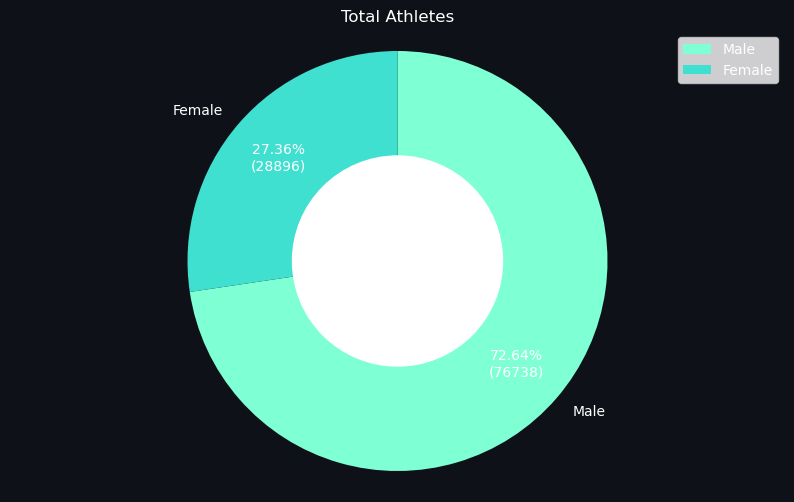

In [40]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.2f}%\n({absolute:d})"
def percent(sex,value):
    if sex==0:
        return value.__str__()+'\n Male Athletes \n'+f"{(value / total_athletes) * 100:.2f}%"
    else:
        return value.__str__()+'\n Female Athletes \n'+f"{(value / total_athletes) * 100:.2f}%"


fig=plt.figure(figsize=(10,6))
plt.rcParams['text.color'] = 'white'
circle=plt.Circle((0,0),0.5,color='white')
fig.patch.set_facecolor('#0e1117')
data=[total_male_athlete,total_female_athlete]
plt.pie(data,labels=['Male','Female'],colors=[m_colors[0],f_colors[0]],autopct=lambda pct: func(pct, data),counterclock=False,startangle=90,pctdistance=0.75,)
plt.axis('equal')
plt.title('Total Athletes')
plt.legend()
plt.gca().add_artist(circle)
plt.show()